In [2]:
import re
import numpy as np 
import pandas as pd

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("narayanyadav/fraud-call-india-dataset")

print("Path to dataset files:", path)

c:\Users\Mahesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 208k/208k [00:00<00:00, 232kB/s]

Extracting files...
Path to dataset files: C:\Users\Mahesh\.cache\kagglehub\datasets\narayanyadav\fraud-call-india-dataset\versions\2


In [12]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [15]:
data = pd.read_csv("C:/Users/Mahesh/Downloads/Fraud Call Dataset/fraud_call.file",sep='\t',names=['label','content'], on_bad_lines='skip')

In [16]:
data.head()

,label,content
0,fraud,"hello, i m bank manager of SBI, ur debit card ..."
1,fraud,Todays Vodafone numbers ending with 4882 are s...
2,normal,Please don't say like that. Hi hi hi
3,normal,Thank you!
4,normal,Oh that was a forwarded message. I thought you...


In [17]:
data['label'].value_counts()

label
normal    5286
fraud      638
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

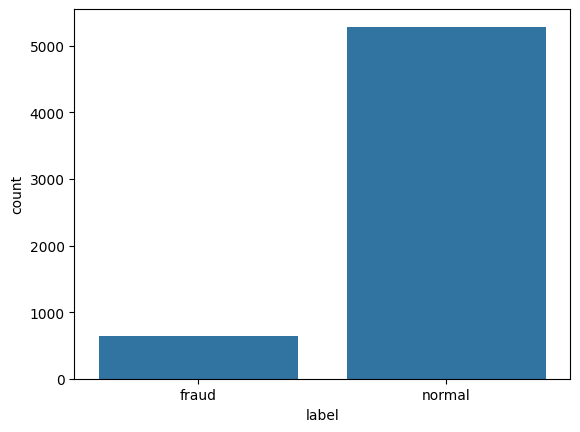

In [19]:
import seaborn as sns

sns.countplot(x='label', data=data)


In [20]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
ps = WordNetLemmatizer()
cv = TfidfVectorizer(max_features=500)

In [21]:
def remove_digit(data) :
    corpos = []
    for i in range(0, len(data)) :
        review = re.sub('[^a-zA-Z]', ' ', data['content'][i])
        review = review.lower()
        review = review.split()
        review = [ps.lemmatize(word) for word in review if word not in stopwords.words('english')]
        review = ' '.join(review)
        corpos.append(review)
    return corpos

In [22]:
from sklearn.metrics import recall_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,accuracy_score

In [25]:
def detect_model(corpos, data):
    x = cv.fit_transform(corpos).toarray()
    y = pd.get_dummies(data['label'])
    y = y.iloc[:, 1].values
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

    fraud_detect = MultinomialNB().fit(x_train, y_train)
    print("model has trained.")

    y_ped = fraud_detect.predict(x_test)
    cong_m = confusion_matrix(y_test, y_ped)
    acc = accuracy_score(y_test, y_ped)
    recall = recall_score(y_test,y_ped)
    cl_r = classification_report(y_test,y_ped)

    print("Confusion matrix:\n", cong_m)
    print("Accuracy_score:", acc)
    print("recall_score is:",recall)
    print("Classification report:\n",cl_r)
    
    return fraud_detect

In [26]:
list = remove_digit(data)
model= detect_model(list, data)

model has trained.
Confusion matrix:
 [[  96   29]
 [   8 1052]]
Accuracy_score: 0.9687763713080169
recall_score is: 0.9924528301886792
Classification report:
               precision    recall  f1-score   support

       False       0.92      0.77      0.84       125
        True       0.97      0.99      0.98      1060

    accuracy                           0.97      1185
   macro avg       0.95      0.88      0.91      1185
weighted avg       0.97      0.97      0.97      1185

